# Deskripsi yg digunakan

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Memanggil dataset

In [2]:
df = pd.read_csv("survey lung cancer.csv")

# Deskripsi dataset

In [3]:
df.head()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,M,69,1,2,2,1,1,2,1,2,2,2,2,2,2,YES
1,M,74,2,1,1,1,2,2,2,1,1,1,2,2,2,YES
2,F,59,1,1,1,2,1,2,1,2,1,2,2,1,2,NO
3,M,63,2,2,2,1,1,1,1,1,2,1,1,2,2,NO
4,F,63,1,2,1,1,1,1,1,2,1,2,2,1,1,NO


In [4]:
df.shape

(309, 16)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309 entries, 0 to 308
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   GENDER                 309 non-null    object
 1   AGE                    309 non-null    int64 
 2   SMOKING                309 non-null    int64 
 3   YELLOW_FINGERS         309 non-null    int64 
 4   ANXIETY                309 non-null    int64 
 5   PEER_PRESSURE          309 non-null    int64 
 6   CHRONIC DISEASE        309 non-null    int64 
 7   FATIGUE                309 non-null    int64 
 8   ALLERGY                309 non-null    int64 
 9   WHEEZING               309 non-null    int64 
 10  ALCOHOL CONSUMING      309 non-null    int64 
 11  COUGHING               309 non-null    int64 
 12  SHORTNESS OF BREATH    309 non-null    int64 
 13  SWALLOWING DIFFICULTY  309 non-null    int64 
 14  CHEST PAIN             309 non-null    int64 
 15  LUNG_CANCER            

In [6]:
df = df.drop(['GENDER'], axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309 entries, 0 to 308
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   AGE                    309 non-null    int64 
 1   SMOKING                309 non-null    int64 
 2   YELLOW_FINGERS         309 non-null    int64 
 3   ANXIETY                309 non-null    int64 
 4   PEER_PRESSURE          309 non-null    int64 
 5   CHRONIC DISEASE        309 non-null    int64 
 6   FATIGUE                309 non-null    int64 
 7   ALLERGY                309 non-null    int64 
 8   WHEEZING               309 non-null    int64 
 9   ALCOHOL CONSUMING      309 non-null    int64 
 10  COUGHING               309 non-null    int64 
 11  SHORTNESS OF BREATH    309 non-null    int64 
 12  SWALLOWING DIFFICULTY  309 non-null    int64 
 13  CHEST PAIN             309 non-null    int64 
 14  LUNG_CANCER            309 non-null    object
dtypes: int64(14), object(1)

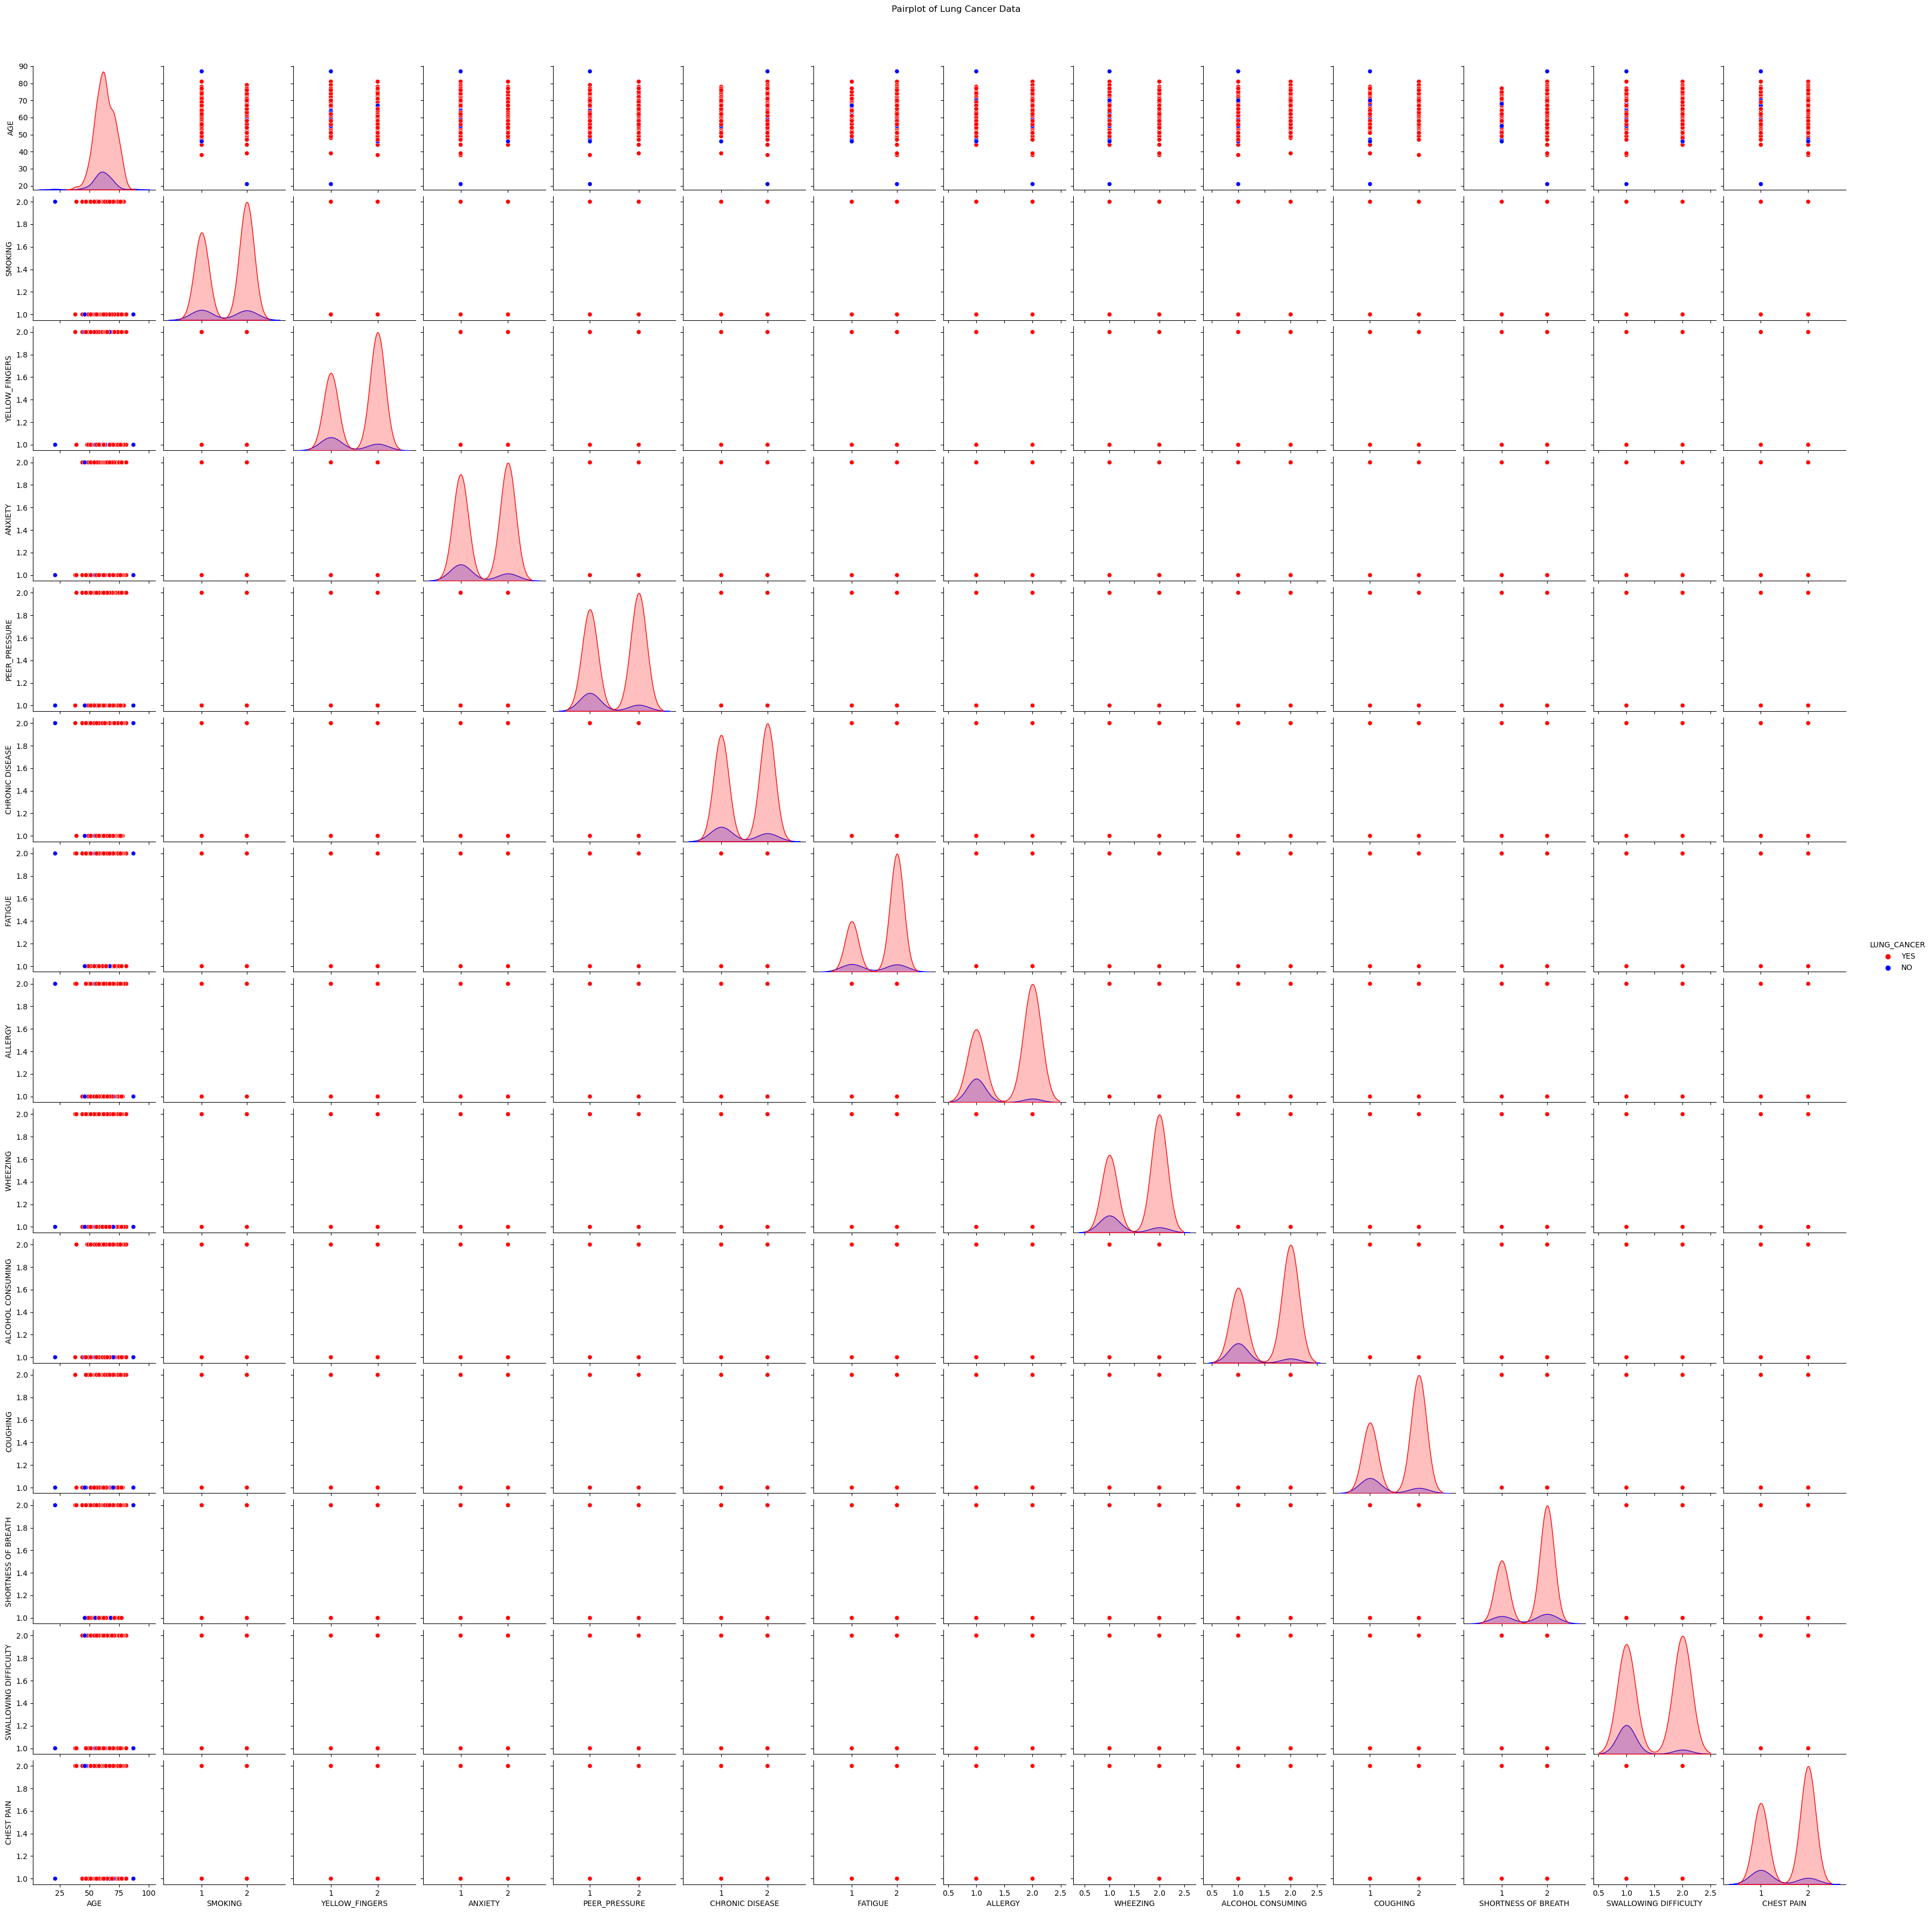

In [7]:
sns.pairplot(df, hue='LUNG_CANCER', palette={'YES': 'red', 'NO': 'blue'})
plt.suptitle('Pairplot of Lung Cancer Data', y=1.02)
plt.show()

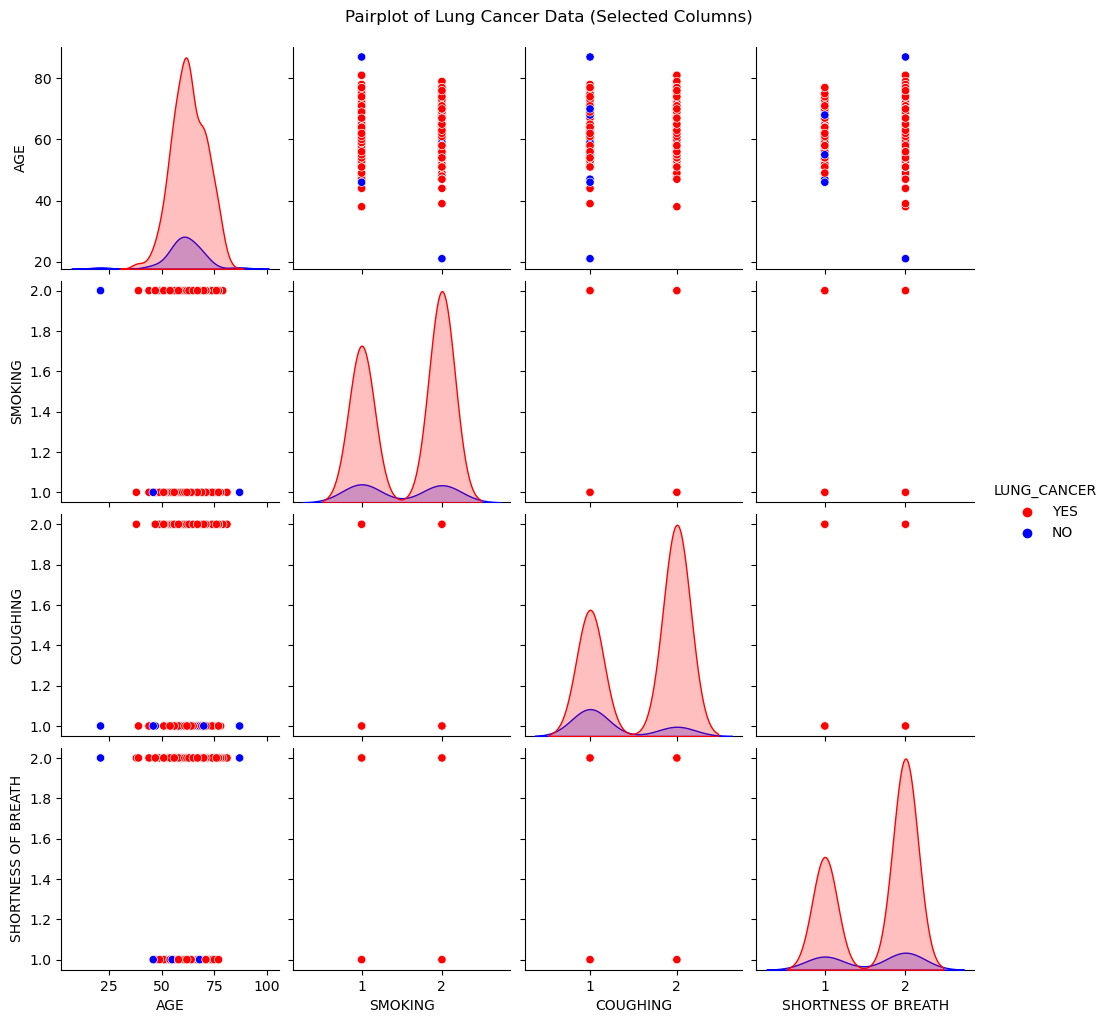

In [8]:
# Pilih 4 kolom yang ingin ditampilkan dalam pair plot
selected_columns = ['AGE', 'SMOKING', 'COUGHING', 'SHORTNESS OF BREATH', 'LUNG_CANCER']
subset_df = df[selected_columns]

# Plot pair plot untuk 4 kolom
sns.pairplot(subset_df, hue='LUNG_CANCER', palette={'YES': 'red', 'NO': 'blue'})
plt.suptitle('Pairplot of Lung Cancer Data (Selected Columns)', y=1.02)
plt.show()

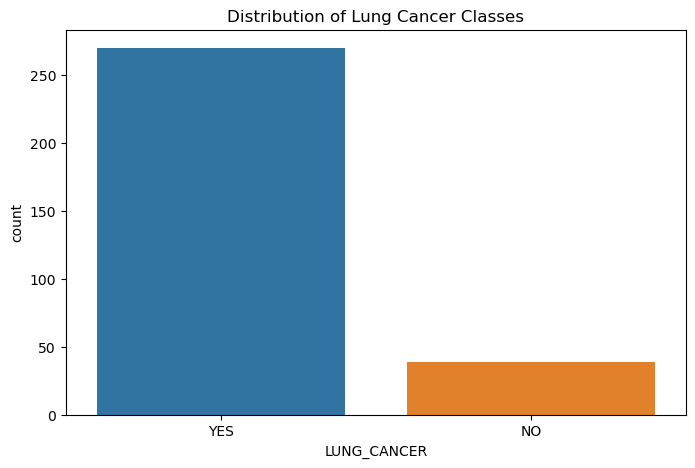

In [9]:
# Countplot untuk distribusi kelas
plt.figure(figsize=(8, 5))
sns.countplot(x='LUNG_CANCER', data=df)
plt.title('Distribution of Lung Cancer Classes')
plt.show()

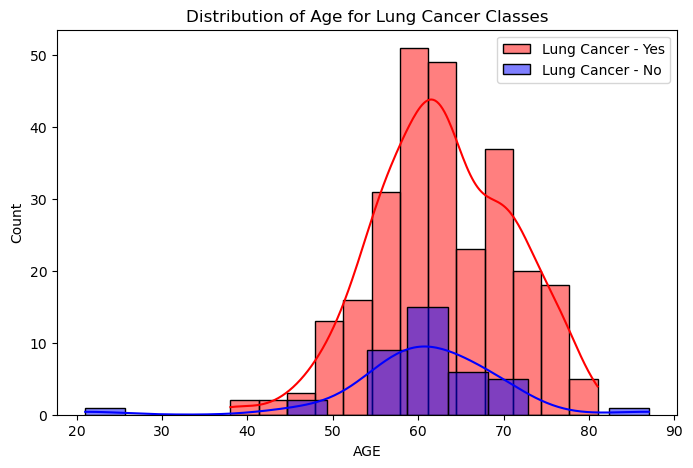

In [10]:
# Dustribusi fitur (AGE)
plt.figure(figsize=(8, 5))
sns.histplot(df[df['LUNG_CANCER'] == 'YES']['AGE'], color='red', label='Lung Cancer - Yes', kde=True)
sns.histplot(df[df['LUNG_CANCER'] == 'NO']['AGE'], color='blue', label='Lung Cancer - No', kde=True)
plt.title('Distribution of Age for Lung Cancer Classes')
plt.legend()
plt.show()

<Axes: >

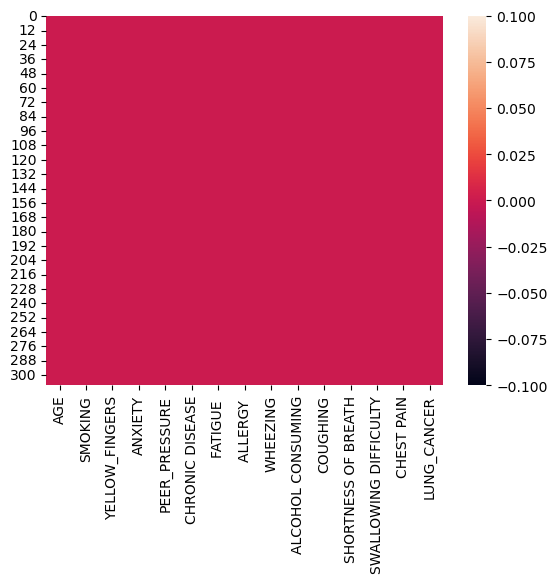

In [11]:
sns.heatmap(df.isnull())

C:\Users\putri\AppData\Local\Temp\ipykernel_11500\3629252972.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True)


<Axes: >

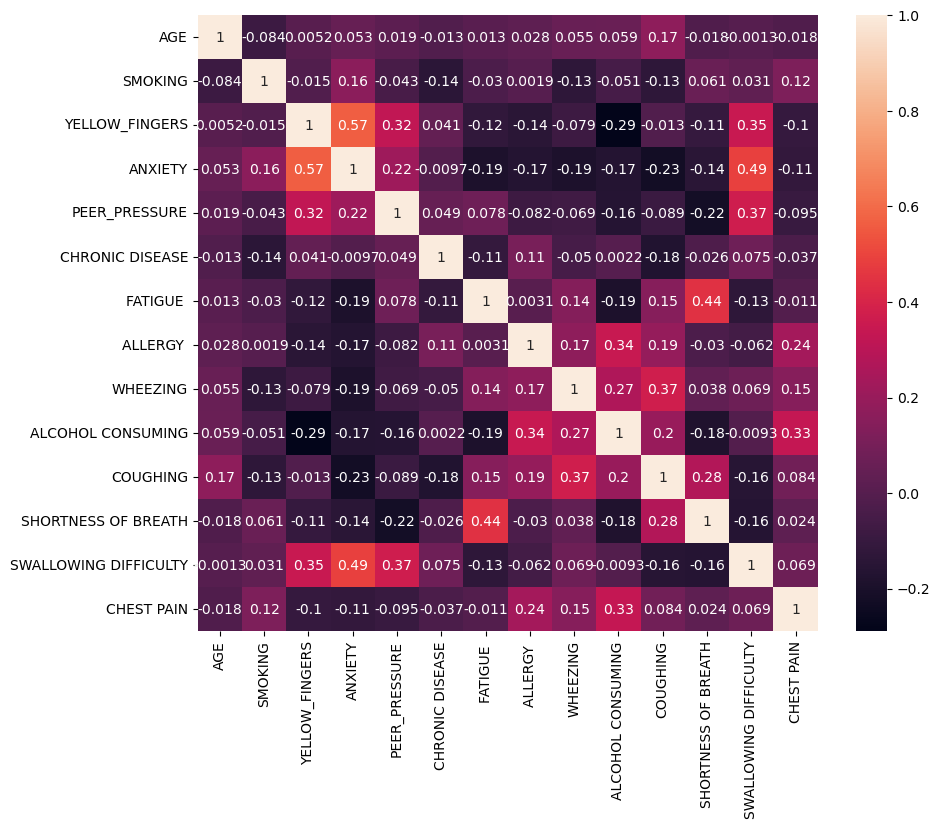

In [12]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), annot=True)

In [13]:
# Pilih fitur-fitur yang akan digunakan untuk prediksi
features = df[['AGE', 'SMOKING', 'YELLOW_FINGERS', 'ANXIETY', 'PEER_PRESSURE',
               'COUGHING', 'SHORTNESS OF BREATH', 'SWALLOWING DIFFICULTY', 'CHEST PAIN', 'CHRONIC DISEASE', 'WHEEZING']]
target = df['LUNG_CANCER']

# Pisahkan data menjadi data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Normalisasi data latih
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

# Normalisasi data uji menggunakan mean dan std dari data latih
X_test_scaled = scaler.transform(X_test)

# Inisialisasi model K-NN
k = 3
knn_model = KNeighborsClassifier(n_neighbors=k)

# Latih model pada data latih yang telah dinormalisasi
knn_model.fit(X_train_scaled, y_train)

KNeighborsClassifier(n_neighbors=3)

# Makin Predictions
Nilai [30, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1] adalah nilai untuk fitur usia (AGE), merokok (SMOKING), jari kuning (YELLOW FINGERS), kecemasan (ANXIETY), tekanan (PEER PRESSURE), batuk (COUGHING), sesak napas (SHORTNESS OF BREATH), kesulitan menelan (SWALLOWING DIFFICULTY), nyeri dada (CHEST PAIN), penyakit kronis (CHRONIC DISEASE), mengi (WHEEZING). Kemudian, saya menggunakan model K-NN yang telah dilatih sebelumnya untuk memprediksi apakah orang-orang dengan karakteristik tersebut memiliki kanker paru-paru atau tidak. <br>
**YES = KANKER** <br>
**NO = TIDAK KANKER**

In [14]:
# Data baru yang akan diprediksi
new_data_1 = pd.DataFrame([[30, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1]], columns=['AGE', 'SMOKING', 'YELLOW_FINGERS', 'ANXIETY', 'PEER_PRESSURE',
                                                                       'COUGHING', 'SHORTNESS OF BREATH', 'SWALLOWING DIFFICULTY', 'CHEST PAIN', 'CHRONIC DISEASE', 'WHEEZING'])
new_data_2 = pd.DataFrame([[59, 1, 1, 1, 2, 2, 2, 1, 2, 1, 2]], columns=['AGE', 'SMOKING', 'YELLOW_FINGERS', 'ANXIETY', 'PEER_PRESSURE',
                                                                       'COUGHING', 'SHORTNESS OF BREATH', 'SWALLOWING DIFFICULTY', 'CHEST PAIN', 'CHRONIC DISEASE', 'WHEEZING'])

# Normalisasi data baru menggunakan mean dan std dari data latih
new_data_1_scaled = scaler.transform(new_data_1)
new_data_2_scaled = scaler.transform(new_data_2)

# Prediksi label untuk data baru
prediction_1 = knn_model.predict(new_data_1_scaled)
prediction_2 = knn_model.predict(new_data_2_scaled)

# Tampilkan hasil prediksi
print("Apakah Pasien Terkena Penyakit Kanker Paru-Paru?:", prediction_1[0])
print("Apakah Pasien Terkena Penyakit Kanker Paru-Paru?:", prediction_2[0])

Apakah Pasien Terkena Penyakit Kanker Paru-Paru?: YES
Apakah Pasien Terkena Penyakit Kanker Paru-Paru?: YES


# Evaluasi model

In [15]:
y_pred = knn_model.predict(X_test_scaled)
print("Test set predictions:\n {}".format(y_pred))

Test set predictions:
 ['YES' 'YES' 'YES' 'YES' 'YES' 'YES' 'YES' 'YES' 'YES' 'YES' 'YES' 'YES'
 'YES' 'YES' 'YES' 'NO' 'YES' 'YES' 'YES' 'YES' 'NO' 'YES' 'YES' 'YES'
 'YES' 'YES' 'YES' 'YES' 'YES' 'YES' 'YES' 'YES' 'YES' 'YES' 'YES' 'YES'
 'YES' 'YES' 'NO' 'YES' 'YES' 'YES' 'YES' 'YES' 'YES' 'YES' 'YES' 'YES'
 'NO' 'YES' 'YES' 'YES' 'YES' 'YES' 'YES' 'YES' 'YES' 'YES' 'YES' 'YES'
 'YES' 'YES']


In [16]:
print(y_pred.shape)

(62,)


In [17]:
print("Accuracy on test set: {:.4f}".format(accuracy_score(y_test, knn_model.predict(scaler.transform(X_test)))))

Accuracy on test set: 0.9355


In [18]:
print("Accuracy: {:.2f}%".format(accuracy_score(y_test, y_pred, normalize=True) * 100))

Accuracy: 93.55%


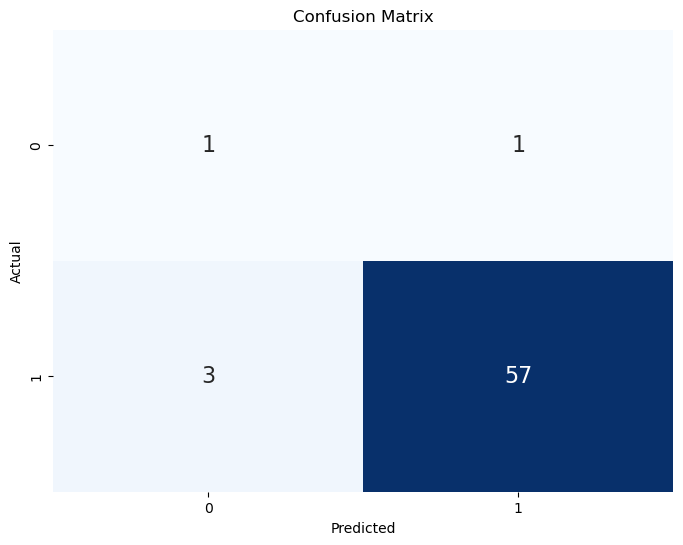

In [19]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

# Visualisasi Confusion Matrix dengan Seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', annot_kws={"size": 16}, cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

Penjelasan confusion matrix: <br>

TN (True Negative): Jumlah sampel yang benar-benar negatif dan telah diprediksi dengan benar sebagai negatif = 1 <br>
FP (False Positive): Jumlah sampel yang sebenarnya negatif tetapi telah salah diprediksi sebagai positif = 1 <br>
FN (False Negative): Jumlah sampel yang sebenarnya positif tetapi telah salah diprediksi sebagai negatif = 3 <br>
TP (True Positive): Jumlah sampel yang benar-benar positif dan telah diprediksi dengan benar sebagai positif = 57 <br>

In [20]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

          NO       0.25      0.50      0.33         2
         YES       0.98      0.95      0.97        60

    accuracy                           0.94        62
   macro avg       0.62      0.72      0.65        62
weighted avg       0.96      0.94      0.95        62



In [22]:
import pickle

filename = 'knn-paru-paru.sav'
pickle.dump(knn_model, open(filename, 'wb'))